In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
path = "/Users/grai/"
df_original = pd.read_csv(path+'ghost_data.csv')

In [3]:
df=df_original.copy()

In [4]:
df.head()

,timestamp,cp_code,request_id,obj_size,bytes_served,new_connection,origin_hit,system_buffer,hoc,gzip_unzip,ssl,cca_bbr,ocl,phtm_usecs,gzu_usecs,agg_flytes,cpu_flytes,mdt_application_usecs
0,1.625063e+09,111,17,16183,16183,1,0,0,0,0,1,1,0,0,0,0,0,0
1,1.625063e+09,111,25,27197,27197,1,0,0,0,0,1,1,0,0,0,0,0,0
2,1.625063e+09,111,31,5719,5719,1,0,0,0,0,1,1,0,0,0,0,0,0
3,1.625063e+09,111,3f,786489,786489,1,0,0,0,0,1,1,0,387,0,0,0,0
4,1.625063e+09,1,48,102400,102400,1,1,0,0,1,0,1,497,4996,120,6080,74933,377


/Users/grai/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='obj_size', ylabel='Density'>

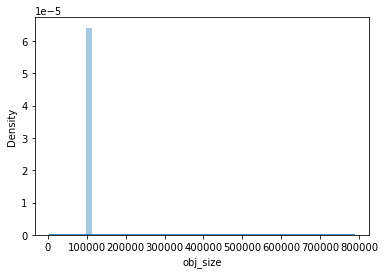

In [5]:
sns.distplot(df.obj_size)

# Pre-Processing and Exploratory Data Analysis

In [6]:
df.columns

Index(['timestamp', 'cp_code', 'request_id', 'obj_size', 'bytes_served',
       'new_connection', 'origin_hit', 'system_buffer', 'hoc', 'gzip_unzip',
       'ssl', 'cca_bbr', 'ocl', 'phtm_usecs', 'gzu_usecs', 'agg_flytes',
       'cpu_flytes', 'mdt_application_usecs'],
      dtype='object')

In [7]:
df.shape

(4927341, 18)

In [8]:
df.cp_code.value_counts()

1      4927333
111          8
Name: cp_code, dtype: int64

In [586]:
df.loc[df.cp_code==111]

,timestamp,cp_code,request_id,obj_size,bytes_served,new_connection,origin_hit,system_buffer,hoc,gzip_unzip,ssl,cca_bbr,ocl,phtm_usecs,gzu_usecs,agg_flytes,cpu_flytes,mdt_application_usecs
0,1.625063e+09,111,17,16183,16183,1,0,0,0,0,1,1,0,0,0,0,0,0
1,1.625063e+09,111,25,27197,27197,1,0,0,0,0,1,1,0,0,0,0,0,0
2,1.625063e+09,111,31,5719,5719,1,0,0,0,0,1,1,0,0,0,0,0,0
3,1.625063e+09,111,3f,786489,786489,1,0,0,0,0,1,1,0,387,0,0,0,0
4927337,1.625064e+09,111,4b333b,18257,18257,1,0,0,0,0,1,1,0,362,0,0,0,0
4927338,1.625064e+09,111,4b3349,27851,27851,1,0,0,0,0,1,1,0,366,0,0,0,0
4927339,1.625064e+09,111,4b3357,5723,5723,1,0,0,0,0,1,1,0,340,0,0,0,0
4927340,1.625064e+09,111,4b3366,786489,786489,1,0,0,0,0,1,1,0,341,0,0,0,0


In [587]:
df.loc[df.cpu_flytes==0]

,timestamp,cp_code,request_id,obj_size,bytes_served,new_connection,origin_hit,system_buffer,hoc,gzip_unzip,ssl,cca_bbr,ocl,phtm_usecs,gzu_usecs,agg_flytes,cpu_flytes,mdt_application_usecs
0,1.625063e+09,111,17,16183,16183,1,0,0,0,0,1,1,0,0,0,0,0,0
1,1.625063e+09,111,25,27197,27197,1,0,0,0,0,1,1,0,0,0,0,0,0
2,1.625063e+09,111,31,5719,5719,1,0,0,0,0,1,1,0,0,0,0,0,0
3,1.625063e+09,111,3f,786489,786489,1,0,0,0,0,1,1,0,387,0,0,0,0
4927337,1.625064e+09,111,4b333b,18257,18257,1,0,0,0,0,1,1,0,362,0,0,0,0
4927338,1.625064e+09,111,4b3349,27851,27851,1,0,0,0,0,1,1,0,366,0,0,0,0
4927339,1.625064e+09,111,4b3357,5723,5723,1,0,0,0,0,1,1,0,340,0,0,0,0
4927340,1.625064e+09,111,4b3366,786489,786489,1,0,0,0,0,1,1,0,341,0,0,0,0


#### It is observed the all the data points with "cp_code" feature value as 111 are having 0 agg_flytes cpu_flytes and hence are representing represent process with no cost and highly dependent on particular request. So, these data points are required to be dropped.

In [657]:
df = df[df.cp_code!=111]

In [589]:
df.shape

(4927333, 18)

/Users/grai/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cp_code', ylabel='count'>

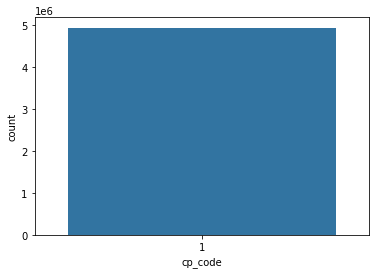

In [590]:
sns.countplot(df.cp_code)

On exploring the data the column "cp_code" have to be dropped as it contains only one unique value after dropping the records with cp_code = 111 it is not of any use for our model.

### Dropping the "timestamp" feature as for the linear regression model for prediction of cpu flytes time may not be seen to be contributing. 

In [591]:
df.timestamp.value_counts()

1.625063e+09    82
1.625063e+09    81
1.625064e+09    71
1.625063e+09    60
1.625063e+09    56
                ..
1.625063e+09     1
1.625064e+09     1
1.625063e+09     1
1.625064e+09     1
1.625064e+09     1
Name: timestamp, Length: 564559, dtype: int64

In [658]:
df.drop(['cp_code','timestamp'],axis=1,inplace=True)

In [659]:
df.head()

,request_id,obj_size,bytes_served,new_connection,origin_hit,system_buffer,hoc,gzip_unzip,ssl,cca_bbr,ocl,phtm_usecs,gzu_usecs,agg_flytes,cpu_flytes,mdt_application_usecs
4,48,102400,102400,1,1,0,0,1,0,1,497,4996,120,6080,74933,377
5,52,102400,102400,1,1,0,0,1,0,1,497,999,84,1880,16646,185
6,44,102400,102400,1,1,0,0,1,0,1,497,4236,173,6059,70594,646
7,53,102400,102400,1,1,0,0,1,0,1,497,2574,103,5234,38605,321
8,45,102400,102400,1,1,0,0,1,0,1,497,2474,94,1672,37106,525


In [17]:
df.request_id.value_counts(),df.request_id.value_counts().index

(1e9de1    1
 127cca    1
 475619    1
 20aba4    1
 36d3fb    1
          ..
 94c19     1
 a0d77     1
 1b318b    1
 3aa494    1
 24074d    1
 Name: request_id, Length: 4927333, dtype: int64,
 Index(['1e9de1', '127cca', '475619', '20aba4', '36d3fb', 'dedda', '510c1',
        '2eb012', 'e7264', '2f6b3f',
        ...
        '40f5e4', '2f9e6c', '2e5ec', '3dc701', '304d29', '94c19', 'a0d77',
        '1b318b', '3aa494', '24074d'],
       dtype='object', length=4927333))

## Feature "request_id" have values unique to particular request i.e. datapoints and may not be useful in our linear regression model.

In [660]:
df.drop(["request_id"],axis=1,inplace=True)

In [595]:
df.head()

,obj_size,bytes_served,new_connection,origin_hit,system_buffer,hoc,gzip_unzip,ssl,cca_bbr,ocl,phtm_usecs,gzu_usecs,agg_flytes,cpu_flytes,mdt_application_usecs
4,102400,102400,1,1,0,0,1,0,1,497,4996,120,6080,74933,377
5,102400,102400,1,1,0,0,1,0,1,497,999,84,1880,16646,185
6,102400,102400,1,1,0,0,1,0,1,497,4236,173,6059,70594,646
7,102400,102400,1,1,0,0,1,0,1,497,2574,103,5234,38605,321
8,102400,102400,1,1,0,0,1,0,1,497,2474,94,1672,37106,525


In [661]:
# Copying the original data set
df1=df.copy()

In [597]:
df.shape

(4927333, 15)

In [598]:
df.isna().sum()

obj_size                 0
bytes_served             0
new_connection           0
origin_hit               0
system_buffer            0
hoc                      0
gzip_unzip               0
ssl                      0
cca_bbr                  0
ocl                      0
phtm_usecs               0
gzu_usecs                0
agg_flytes               0
cpu_flytes               0
mdt_application_usecs    0
dtype: int64

<AxesSubplot:>

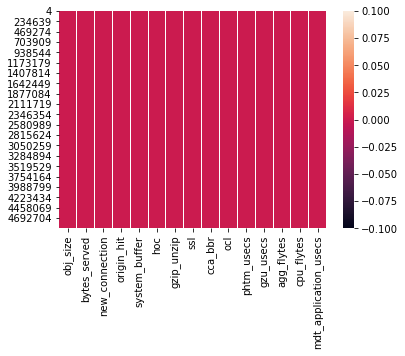

In [599]:
sns.heatmap(df.isna())

# No missing values in any feature as such is observed.



In [246]:
df.dtypes

obj_size                 int64
bytes_served             int64
new_connection           int64
origin_hit               int64
system_buffer            int64
hoc                      int64
gzip_unzip               int64
ssl                      int64
cca_bbr                  int64
ocl                      int64
phtm_usecs               int64
gzu_usecs                int64
agg_flytes               int64
cpu_flytes               int64
mdt_application_usecs    int64
dtype: object

In [32]:
df.columns

Index(['obj_size', 'bytes_served', 'new_connection', 'origin_hit',
       'system_buffer', 'hoc', 'gzip_unzip', 'ssl', 'cca_bbr', 'ocl',
       'phtm_usecs', 'gzu_usecs', 'agg_flytes', 'cpu_flytes',
       'mdt_application_usecs'],
      dtype='object')

In [33]:
df.obj_size.describe()

count    4927333.0
mean      102400.0
std            0.0
min       102400.0
25%       102400.0
50%       102400.0
75%       102400.0
max       102400.0
Name: obj_size, dtype: float64

In [34]:
df.obj_size.unique()

array([102400])

In [35]:
df.obj_size.value_counts()

102400    4927333
Name: obj_size, dtype: int64

In [39]:
df.bytes_served.unique()

array([102400])

In [40]:
df.bytes_served.value_counts()

102400    4927333
Name: bytes_served, dtype: int64

## Feature "obj_size" have no variance throughout the dataset
### Similarly for the feature bytes_served we have only one unique value of 102400 throughout the dataset and no variances are observed.

In [662]:
df.head()

,obj_size,bytes_served,new_connection,origin_hit,system_buffer,hoc,gzip_unzip,ssl,cca_bbr,ocl,phtm_usecs,gzu_usecs,agg_flytes,cpu_flytes,mdt_application_usecs
4,102400,102400,1,1,0,0,1,0,1,497,4996,120,6080,74933,377
5,102400,102400,1,1,0,0,1,0,1,497,999,84,1880,16646,185
6,102400,102400,1,1,0,0,1,0,1,497,4236,173,6059,70594,646
7,102400,102400,1,1,0,0,1,0,1,497,2574,103,5234,38605,321
8,102400,102400,1,1,0,0,1,0,1,497,2474,94,1672,37106,525


#### The values of all the data points are same for both features "obj_size" and "bytes_served" so combining the feature i.e. “bytes_served” and “obj_size” to form "bytes_served+obj_size” or also one can be dropped as the coefficients for interpretation will be same for the both.

In [663]:
df.drop(["bytes_served"],axis=1,inplace=True)

In [601]:
df.head()

,obj_size,new_connection,origin_hit,system_buffer,hoc,gzip_unzip,ssl,cca_bbr,ocl,phtm_usecs,gzu_usecs,agg_flytes,cpu_flytes,mdt_application_usecs
4,102400,1,1,0,0,1,0,1,497,4996,120,6080,74933,377
5,102400,1,1,0,0,1,0,1,497,999,84,1880,16646,185
6,102400,1,1,0,0,1,0,1,497,4236,173,6059,70594,646
7,102400,1,1,0,0,1,0,1,497,2574,103,5234,38605,321
8,102400,1,1,0,0,1,0,1,497,2474,94,1672,37106,525


In [52]:
# Going through all the feature and checking for the unique values
for i in df.columns:
    print(df[i].value_counts())

102400    4927333
Name: obj_size, dtype: int64
0    4926333
1       1000
Name: origin_hit, dtype: int64
0    4887412
1      39921
Name: system_buffer, dtype: int64
1    4886412
0      40921
Name: hoc, dtype: int64
1    4927333
Name: gzip_unzip, dtype: int64
0    4927333
Name: ssl, dtype: int64
1    4927333
Name: cca_bbr, dtype: int64
497    4927333
Name: ocl, dtype: int64
575     40684
574     40648
572     40573
569     40455
576     40442
        ...  
1002        1
997         1
996         1
994         1
2574        1
Name: phtm_usecs, Length: 708, dtype: int64
118    122694
117    122631
119    122391
116    121850
120    121760
        ...  
57          1
62          1
60          1
58          1
309         1
Name: gzu_usecs, Length: 204, dtype: int64
1354    33912
1349    33778
1346    33701
1350    33645
1353    33597
        ...  
2154        1
2146        1
2147        1
2144        1
7135        1
Name: agg_flytes, Length: 1158, dtype: int64
17887    1614
17917    1611
176

## Drop features ["new_connection","gzip_unzip","ssl","cca_bbr","ocl"] since it has only 1 unique value as all the connections are new connections so, no variace will cause the model to blow off.

In [664]:
df.drop(["new_connection","gzip_unzip","ssl","cca_bbr","ocl"],axis=1,inplace=True)

In [603]:
df.head()

,obj_size,origin_hit,system_buffer,hoc,phtm_usecs,gzu_usecs,agg_flytes,cpu_flytes,mdt_application_usecs
4,102400,1,0,0,4996,120,6080,74933,377
5,102400,1,0,0,999,84,1880,16646,185
6,102400,1,0,0,4236,173,6059,70594,646
7,102400,1,0,0,2574,103,5234,38605,321
8,102400,1,0,0,2474,94,1672,37106,525


In [665]:
df.phtm_usecs.describe()

count    4.927333e+06
mean     5.793644e+02
std      5.307269e+01
min      3.850000e+02
25%      5.440000e+02
50%      5.760000e+02
75%      6.110000e+02
max      5.562000e+03
Name: phtm_usecs, dtype: float64

In [666]:
#Outlier detection using 1.5 IQR Rule

def outlier_limits(arr):
    IQR= arr.quantile(.75)-arr.quantile(.25)
    return arr.quantile(.25)-1.5*IQR, arr.quantile(.75)+1.5*IQR

In [667]:
outlier_limits(df.phtm_usecs)

(443.5, 711.5)

/Users/grai/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


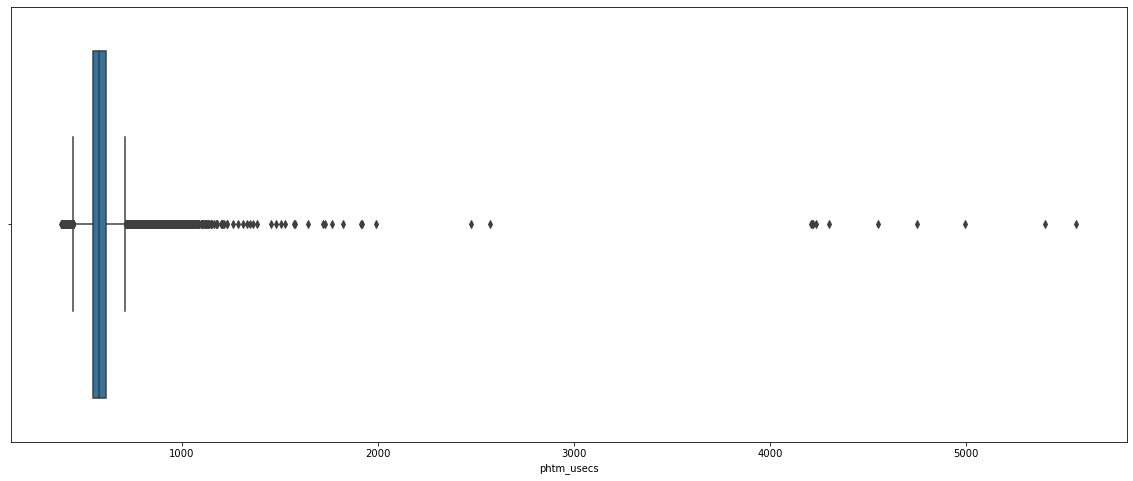

In [606]:
plt.figure(figsize = (20,8))
sns.boxplot(df.phtm_usecs);

/Users/grai/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='phtm_usecs', ylabel='Density'>

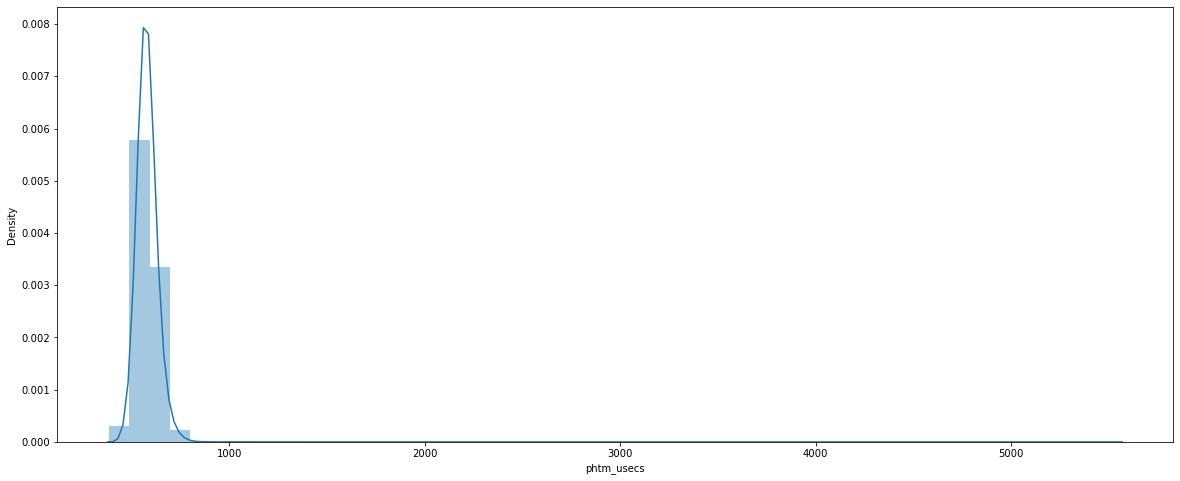

In [607]:
plt.figure(figsize = (20,8))
sns.distplot(df.phtm_usecs)

/Users/grai/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='phtm_usecs', ylabel='Density'>

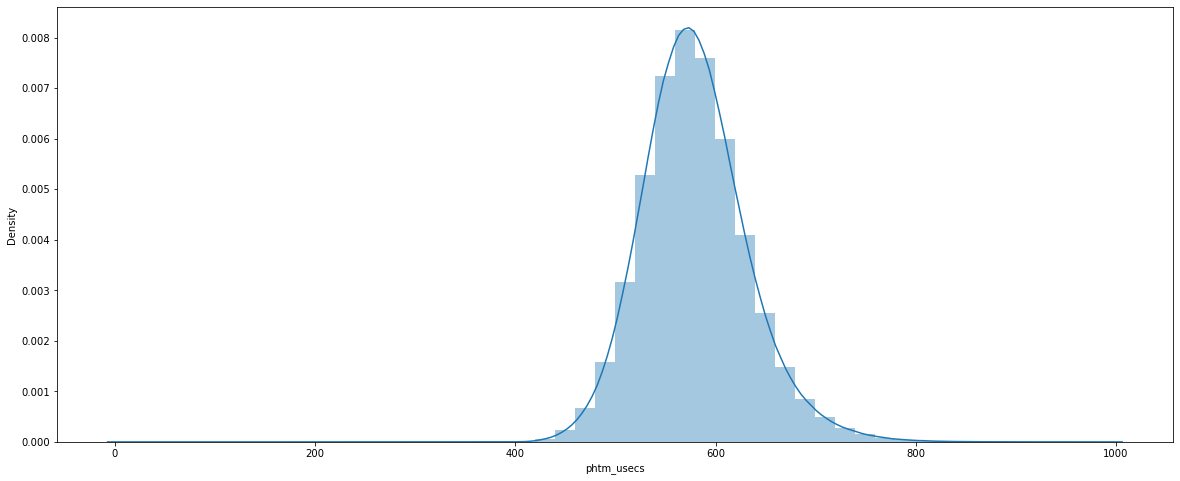

In [10]:
plt.figure(figsize = (20,8))
sns.distplot(df[df.phtm_usecs<1000].phtm_usecs)

In [83]:
df.loc[df.phtm_usecs>712]

,obj_size,origin_hit,system_buffer,hoc,phtm_usecs,gzu_usecs,agg_flytes,cpu_flytes,mdt_application_usecs
4,102400,1,0,0,4996,120,6080,74933,377
5,102400,1,0,0,999,84,1880,16646,185
6,102400,1,0,0,4236,173,6059,70594,646
7,102400,1,0,0,2574,103,5234,38605,321
8,102400,1,0,0,2474,94,1672,37106,525
...,...,...,...,...,...,...,...,...,...
4926513,102400,0,0,1,718,124,1521,22488,205
4926902,102400,0,0,1,783,129,1601,24543,230
4927034,102400,0,0,1,761,105,1568,23847,144
4927219,102400,0,0,1,716,114,1514,22429,133


In [84]:
df.loc[df.phtm_usecs<443]

,obj_size,origin_hit,system_buffer,hoc,phtm_usecs,gzu_usecs,agg_flytes,cpu_flytes,mdt_application_usecs
1634,102400,0,0,1,438,107,1585,6567,104
1711,102400,0,0,1,433,109,1574,6492,100
2065,102400,0,0,1,435,88,1566,6519,96
2134,102400,0,0,1,437,73,1563,6551,102
2349,102400,0,0,1,435,125,1586,6520,99
...,...,...,...,...,...,...,...,...,...
4922940,102400,0,0,1,442,132,1191,13844,100
4923038,102400,0,0,1,429,117,1176,13439,106
4923837,102400,0,0,1,427,108,1174,13368,98
4923953,102400,0,0,1,436,115,1184,13648,101


#### Their are a large no. of outliers present in feature "phtm_usecs" and the outliers using 1.5 IQR rule the no. of outlier above the acceptable upper limit is 72773 and below the lower acceptable limit is 8884 so we need to handle these outliers after learning more on exploration.
First thing is to check is its association with the rest of the features and identify the other features behaviour for the outliers of this feature.
Correlation with the dependent variable.
Can a new feature be formed that can tackle these outliers.
Is any transformation is required.
##### Tackling outliers by capping the values or removing the datapoints with the outliers, later will be better in this scenario as linear regression model is sensitive to outliers and we have a large no. of datapoints.

/Users/grai/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/grai/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


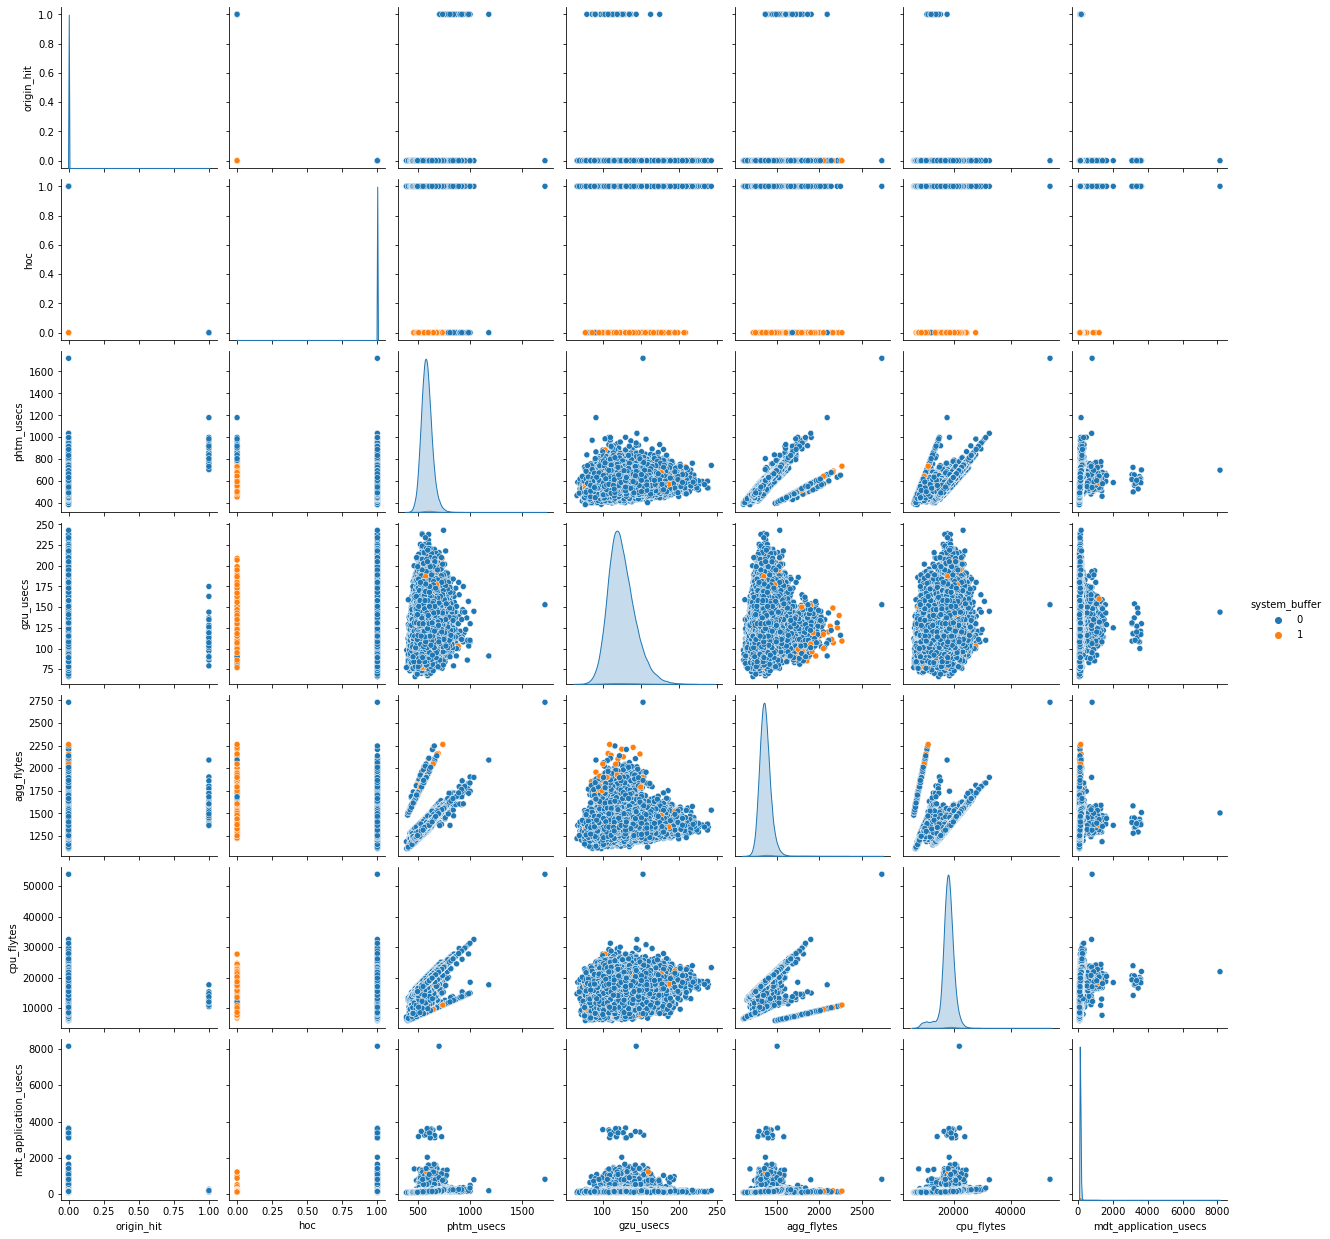

In [93]:
sns.pairplot(df.iloc[:,1:].sample(200000),hue="system_buffer")

# It can be clearly seen that feature distribution are mostly leptokurtic which is generally seen in Financial Data sets.
### Features "hoc" and "system_buffer" are highly inversely correlated.
### Feature "mdt_application_usecs" show some peculier behaviour with not much association with any other variables but is contributing to the flytes, still have large unexplained behaviour and needed a very close look on outliers in the datasets in this feature. 
#### "cpu_flytes" doesnot show as such much association with "origin_hit" and "hoc" and some random scatterplots are seen. 

<AxesSubplot:xlabel='phtm_usecs', ylabel='cpu_flytes'>

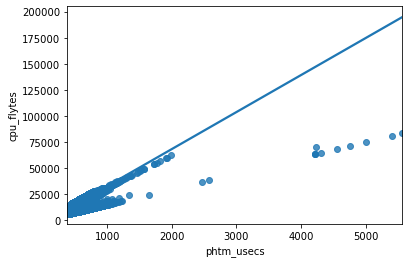

In [94]:
sns.regplot(x="phtm_usecs",y="cpu_flytes",data=df)

### Feature "cpu_flytes" does linearly depend upon "phtm_usecs" but their are some outliers present which are required to be handled. 

<AxesSubplot:xlabel='gzu_usecs', ylabel='cpu_flytes'>

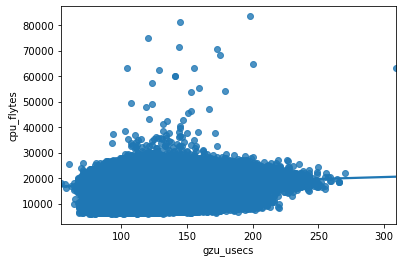

In [95]:
sns.regplot(x="gzu_usecs",y="cpu_flytes",data=df)

### Feature "cpu_flytes" is slightly correlated with "gzu_usecs".

<AxesSubplot:xlabel='agg_flytes', ylabel='cpu_flytes'>

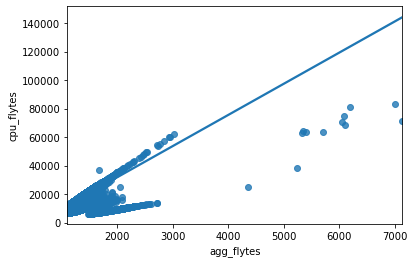

In [96]:
sns.regplot(x="agg_flytes",y="cpu_flytes",data=df)

### Feature "cpu_flytes" does linearly depend upon "agg_flytes" but their are some outliers present which are required to be handled.

<AxesSubplot:xlabel='mdt_application_usecs', ylabel='cpu_flytes'>

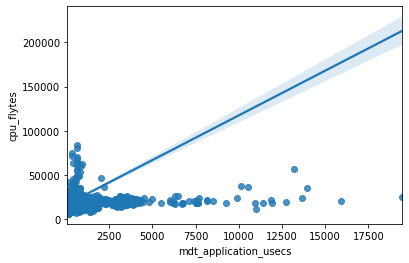

In [97]:
sns.regplot(x="mdt_application_usecs",y="cpu_flytes",data=df)

### Feature "cpu_flytes" does show some association with "mdt_application_usecs" but their are large no. of outliers present which are required to be handled.

## Since, feature "agg_flytes" is just a representation of our response variable "cpu_flytes" we can drop "agg_flytes" as it is a dependent variable.

In [608]:
df.drop(["agg_flytes"],axis=1,inplace=True)

In [609]:
df.corr()

,obj_size,origin_hit,system_buffer,hoc,phtm_usecs,gzu_usecs,cpu_flytes,mdt_application_usecs
obj_size,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
origin_hit,NaN,1.000000,-0.001288,-0.155690,0.080870,-0.006427,-0.026601,0.005489
system_buffer,NaN,-0.001288,1.000000,-0.987605,0.046067,0.015994,0.018398,-0.002654
hoc,NaN,-0.155690,-0.987605,1.000000,-0.058198,-0.014790,-0.013998,0.001760
phtm_usecs,NaN,0.080870,0.046067,-0.058198,1.000000,0.086925,0.784694,0.307857
gzu_usecs,NaN,-0.006427,0.015994,-0.014790,0.086925,1.000000,0.112055,0.024711
cpu_flytes,NaN,-0.026601,0.018398,-0.013998,0.784694,0.112055,1.000000,0.245669
mdt_application_usecs,NaN,0.005489,-0.002654,0.001760,0.307857,0.024711,0.245669,1.000000


<AxesSubplot:>

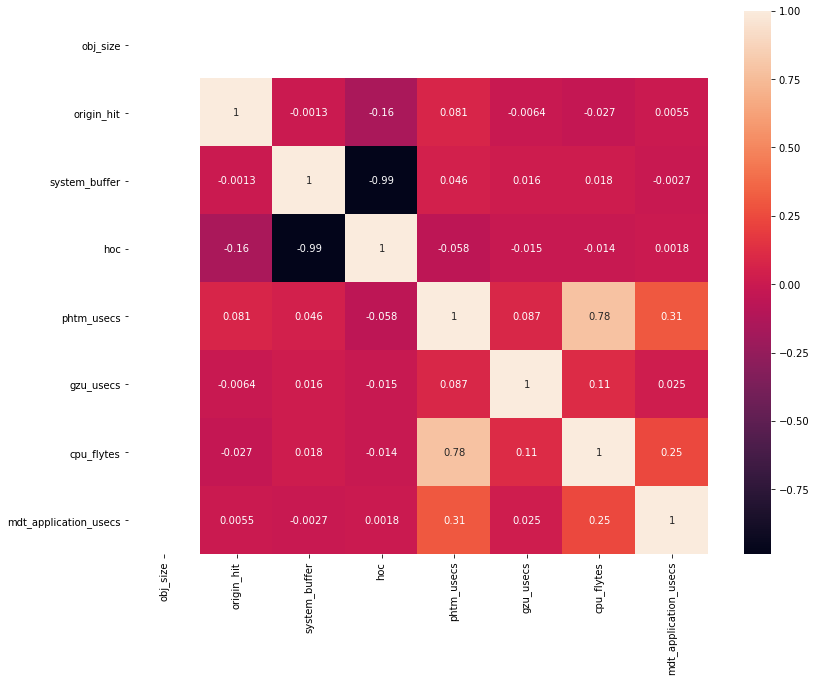

In [610]:
plt.figure(figsize = (13,10))
sns.heatmap(df.corr(),annot=True)

### Features "hoc" and "system_buffer" are highly negative correlated and they need to be combined to form a new feature.
### It can be noticed that feature ["hoc" and "origin_hit"] are negatively correlated with "cpu_flytes" and rest of the features have positive correlation with the "cpu_flytes".

In [611]:
df.head()

,obj_size,origin_hit,system_buffer,hoc,phtm_usecs,gzu_usecs,cpu_flytes,mdt_application_usecs
4,102400,1,0,0,4996,120,74933,377
5,102400,1,0,0,999,84,16646,185
6,102400,1,0,0,4236,173,70594,646
7,102400,1,0,0,2574,103,38605,321
8,102400,1,0,0,2474,94,37106,525


In [668]:
df_without_outlier_treatement=df.copy()

## Dropping all the outliers

In [669]:
outlier_limits(df.phtm_usecs)

(443.5, 711.5)

In [670]:
df=df[(df.phtm_usecs>=443.5)&(df.phtm_usecs<=711.5)]

In [671]:
outlier_limits(df.gzu_usecs)

(77.5, 169.5)

In [672]:
df=df[(df.gzu_usecs>=77.5)&(df.gzu_usecs<=169.5)]

In [673]:
outlier_limits(df.mdt_application_usecs)

(82.0, 186.0)

In [674]:
df=df[(df.mdt_application_usecs>=82)&(df.mdt_application_usecs<=186)]

In [675]:
outlier_limits(df.cpu_flytes)

(13533.5, 22217.5)

In [676]:
df=df[(df.cpu_flytes>=13533.5)&(df.cpu_flytes<=22217.5)]

In [677]:
df.shape

(4319507, 9)

/Users/grai/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


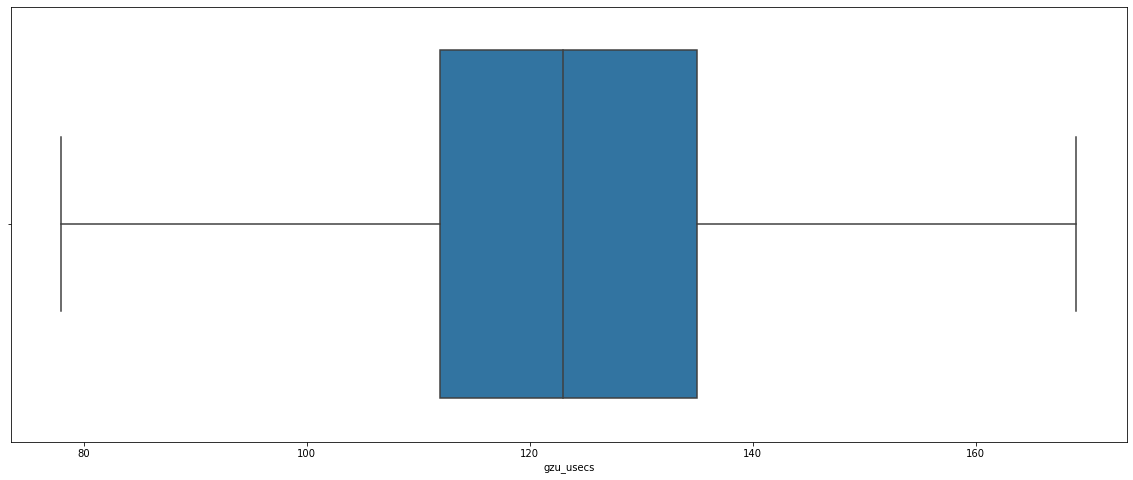

In [678]:
plt.figure(figsize = (20,8))
sns.boxplot(df.gzu_usecs);

/Users/grai/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


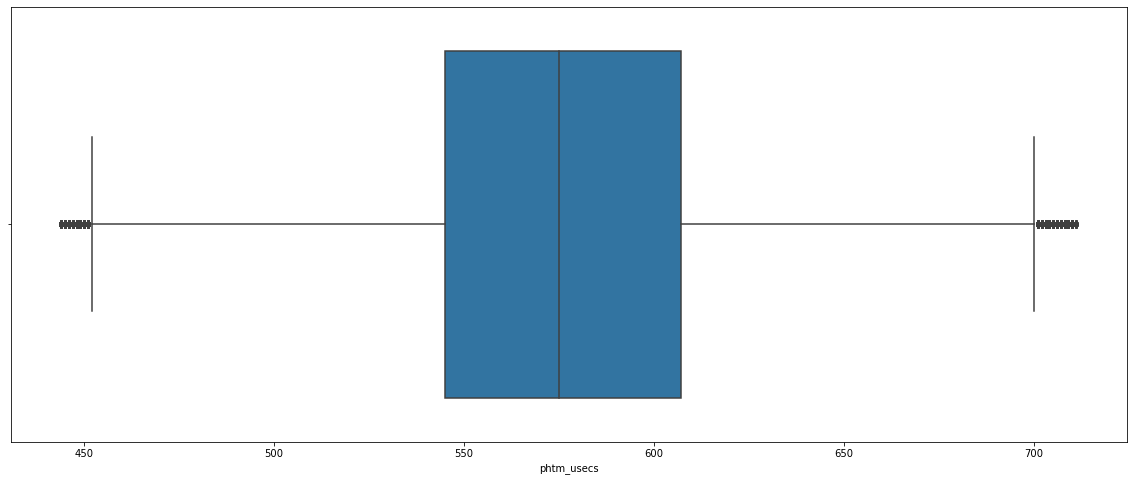

In [679]:
plt.figure(figsize = (20,8))
sns.boxplot(df.phtm_usecs);

In [680]:
outlier_limits(df.phtm_usecs)

(452.0, 700.0)

In [681]:
df.phtm_usecs.describe()

count    4.319507e+06
mean     5.765470e+02
std      4.530027e+01
min      4.440000e+02
25%      5.450000e+02
50%      5.750000e+02
75%      6.070000e+02
max      7.110000e+02
Name: phtm_usecs, dtype: float64

In [682]:
len(df[(df.phtm_usecs<452.0)|(df.phtm_usecs>700)])

15108

In [683]:
df=df[(df.phtm_usecs>=452.0)&(df.phtm_usecs<=700)]

/Users/grai/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='phtm_usecs'>

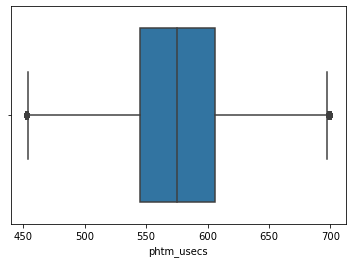

In [684]:
sns.boxplot(df.phtm_usecs)

In [686]:
df.head()

,obj_size,origin_hit,system_buffer,hoc,phtm_usecs,gzu_usecs,agg_flytes,cpu_flytes,mdt_application_usecs
59216,102400,0,0,1,675,105,1555,13883,130
74485,102400,0,0,1,662,169,1544,13615,161
82076,102400,0,0,1,678,106,1557,13945,155
87682,102400,0,0,1,690,141,1573,14191,156
91613,102400,0,0,1,663,142,1543,13636,113


In [688]:
df.origin_hit.unique(),df.origin_hit.value_counts()

(array([0]),
 0    4304399
 Name: origin_hit, dtype: int64)

### Since, features "obj_size" and "origin_hit" have only one unique values we need to drop the two features as their is no variance and no correlation can be established. 

In [689]:
df.corr()

,obj_size,origin_hit,system_buffer,hoc,phtm_usecs,gzu_usecs,agg_flytes,cpu_flytes,mdt_application_usecs
obj_size,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
origin_hit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
system_buffer,NaN,NaN,1.000000,-1.000000,0.051419,0.013090,0.050246,0.046998,-0.006312
hoc,NaN,NaN,-1.000000,1.000000,-0.051419,-0.013090,-0.050246,-0.046998,0.006312
phtm_usecs,NaN,NaN,0.051419,-0.051419,1.000000,0.061266,0.977692,0.917401,0.591546
gzu_usecs,NaN,NaN,0.013090,-0.013090,0.061266,1.000000,0.066760,0.065768,0.017578
agg_flytes,NaN,NaN,0.050246,-0.050246,0.977692,0.066760,1.000000,0.910958,0.580878
cpu_flytes,NaN,NaN,0.046998,-0.046998,0.917401,0.065768,0.910958,1.000000,0.545391
mdt_application_usecs,NaN,NaN,-0.006312,0.006312,0.591546,0.017578,0.580878,0.545391,1.000000


In [690]:
df.drop(["obj_size","origin_hit"],axis=1,inplace=True)

<AxesSubplot:>

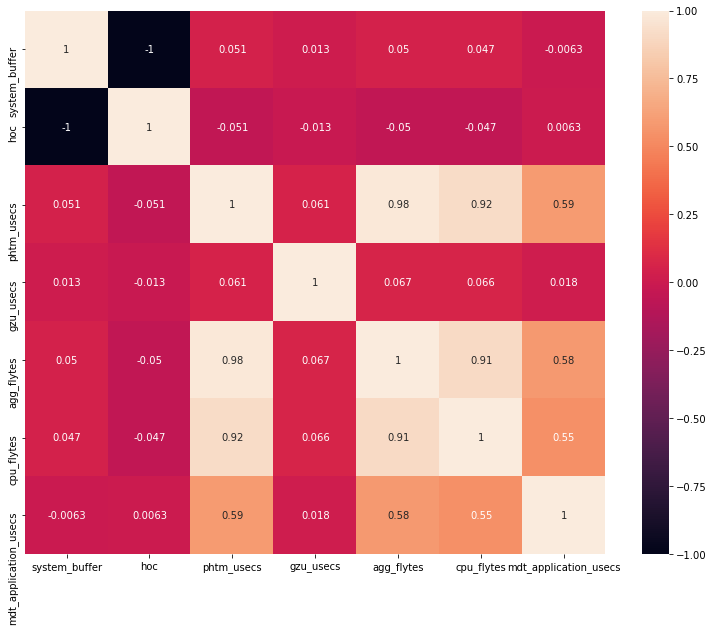

In [691]:
plt.figure(figsize = (13,10))
sns.heatmap(df.corr(),annot=True)

### Increase in the correlation of independent variable "mdt_application_usecs" with "cpu_flytes" is seen after outlier treatement.
### Reduction in the correlation between "phtm_usecs" and "gzu_usecs" is seen on outlier treatement.
### Feature "origin_hit" and "obj_size" is having only one unique values and hence these features have to be dropped and not present in the correlation plot.

## Checking distribution of the response variable "cpu_flytes".

/Users/grai/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='cpu_flytes', ylabel='Density'>

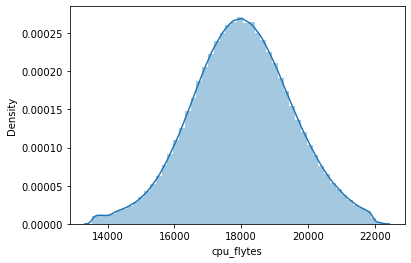

In [692]:
sns.distplot((df.cpu_flytes))

## checking the plot after log transformation and their is some non-normality can be seen at the edges

/Users/grai/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='cpu_flytes', ylabel='Density'>

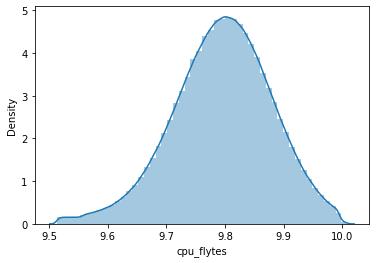

In [693]:
sns.distplot(np.log(df.cpu_flytes))

## Their is not as such improvement after transformation in the distribution is seen.

/Users/grai/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cpu_flytes'>

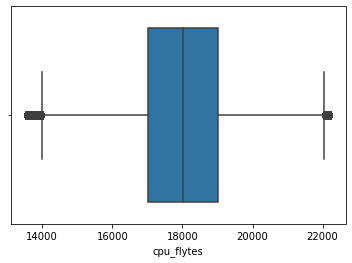

In [694]:
sns.boxplot((df.cpu_flytes))

### Since, we still see some outliers in cpu_flytes we want to handel those outliers stricly by removing them and preventing the normality assumption violation for our model.

In [695]:
outlier_limits(df.cpu_flytes)

(13990.5, 22034.5)

In [696]:
df=df[(df.cpu_flytes>=13990.5)&(df.phtm_usecs<=22034.5)]

In [698]:
df.shape

(4282614, 7)

/Users/grai/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='cpu_flytes', ylabel='Density'>

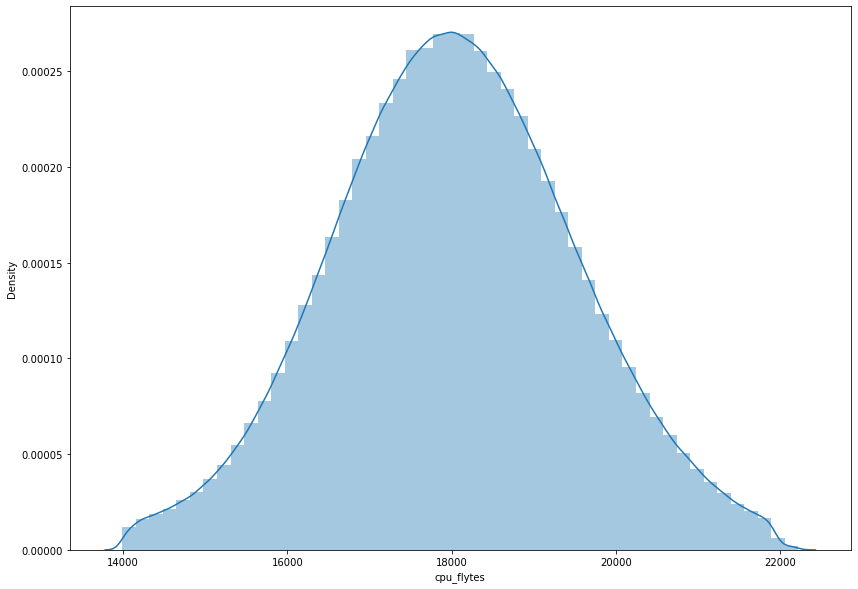

In [699]:
plt.figure(figsize=(14,10))
sns.distplot((df.cpu_flytes))

In [700]:
df.head()

,system_buffer,hoc,phtm_usecs,gzu_usecs,agg_flytes,cpu_flytes,mdt_application_usecs
87682,0,1,690,141,1573,14191,156
97091,0,1,689,131,1572,14173,117
113926,0,1,648,152,1521,14809,140
114914,0,1,681,124,1464,14007,128
115427,0,1,631,108,1502,14420,173


## Dropping feature "agg_flytes" as we can see from the correlation plot and domain knowledge its basically representation of the dependent variable "cpu_flytes".

In [701]:
df.drop(["agg_flytes"],axis=1,inplace=True)

/Users/grai/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [702]:
df.head()

,system_buffer,hoc,phtm_usecs,gzu_usecs,cpu_flytes,mdt_application_usecs
87682,0,1,690,141,14191,156
97091,0,1,689,131,14173,117
113926,0,1,648,152,14809,140
114914,0,1,681,124,14007,128
115427,0,1,631,108,14420,173


In [703]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Visualizing all the continuous features

/Users/grai/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='phtm_usecs', ylabel='Density'>

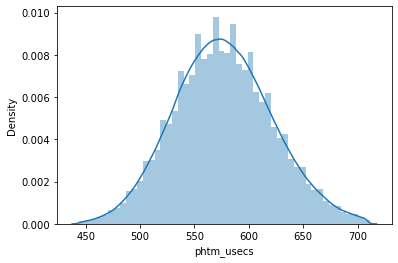

In [634]:
sns.distplot(df.phtm_usecs)

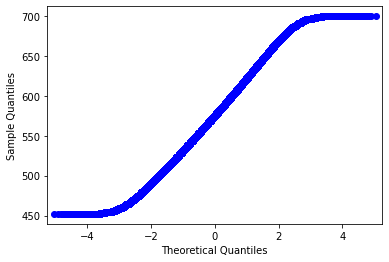

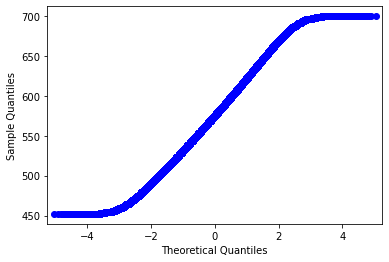

In [706]:
sm.qqplot(df.phtm_usecs)

/Users/grai/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='gzu_usecs', ylabel='Density'>

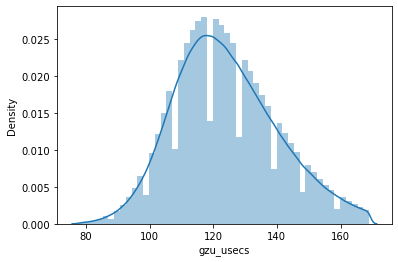

In [707]:
sns.distplot(df.gzu_usecs)

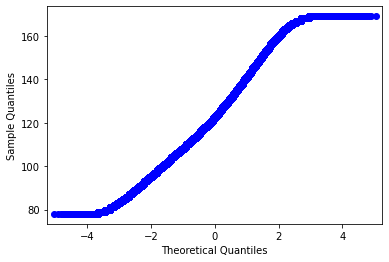

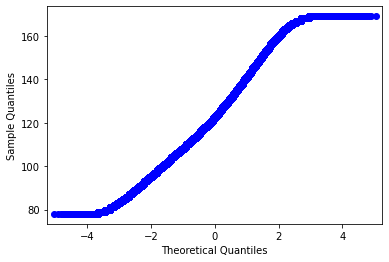

In [708]:
sm.qqplot(df.gzu_usecs)

/Users/grai/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='mdt_application_usecs', ylabel='Density'>

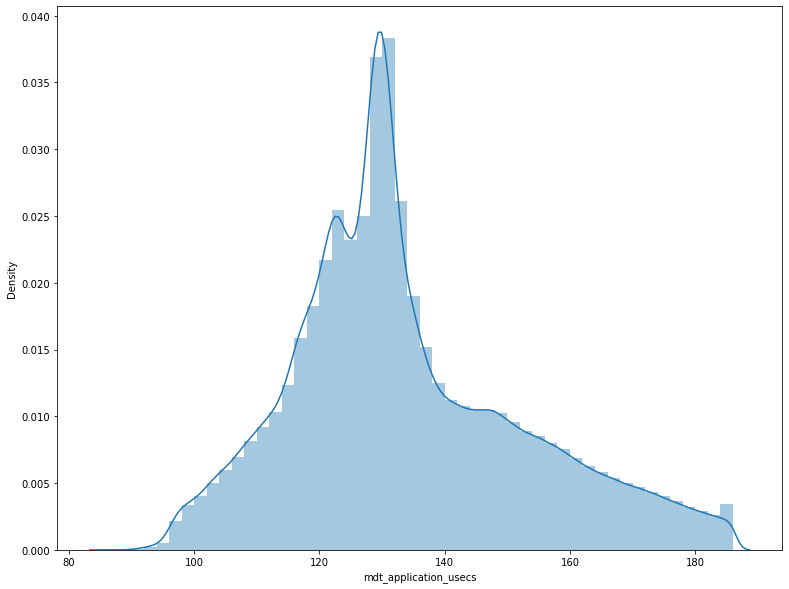

In [709]:
plt.figure(figsize=(13,10))
sns.distplot(df.mdt_application_usecs)

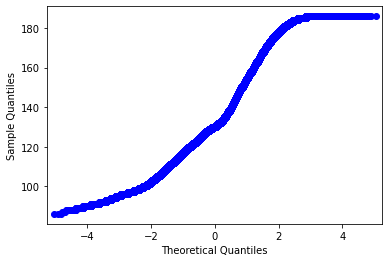

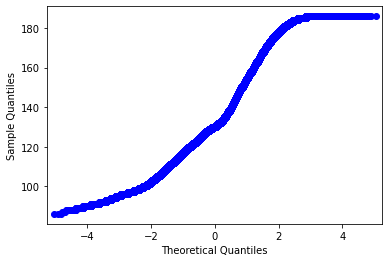

In [710]:
sm.qqplot(df.mdt_application_usecs)

### Feature "mdt_application_usecs" is having a peculiar distribution plot and need to work on using box-cox transformation.
### y = (x**lmbda - 1) / lmbda,  for lmbda != 0
###    log(x),                  for lmbda = 0

boxcox requires the input data to be positive. Sometimes a Box-Cox transformation provides a shift parameter to achieve this; boxcox does not. Such a shift parameter is equivalent to adding a positive constant to x before calling boxcox.

The confidence limits returned when alpha is provided give the interval where:

 
with llf the log-likelihood function and 
 the chi-squared function.



In [739]:
scipy.stats.boxcox(df.mdt_application_usecs, lmbda=1.2, alpha=None)

array([356.08451975, 251.88793241, 312.61964214, ..., 291.25046752,
       342.40129035, 280.66168763])

/Users/grai/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

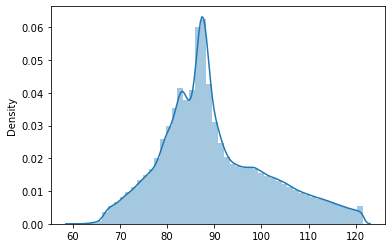

In [742]:
sns.distplot(scipy.stats.boxcox(df.mdt_application_usecs, lmbda=.9, alpha=None))

In [743]:
df.head()

,system_buffer,hoc,phtm_usecs,gzu_usecs,cpu_flytes,mdt_application_usecs
87682,0,1,690,141,14191,156
97091,0,1,689,131,14173,117
113926,0,1,648,152,14809,140
114914,0,1,681,124,14007,128
115427,0,1,631,108,14420,173


In [290]:
outlier_limits(df.log_mdt_application_usecs)

(4.514234201186969, 5.286999117310401)

/Users/grai/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='log_mdt_application_usecs'>

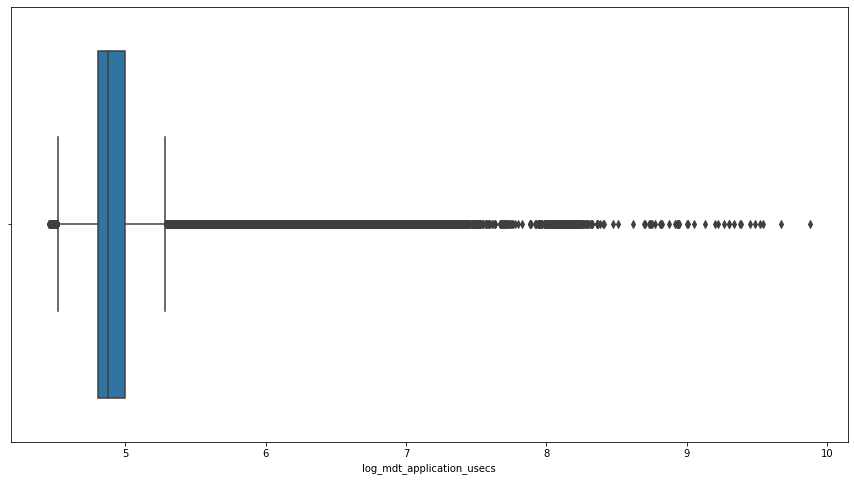

In [291]:
plt.figure(figsize=(15,8))
sns.boxplot(df.log_mdt_application_usecs)

In [293]:
df[df.log_mdt_application_usecs>5.286999117310401]

,obj_size,origin_hit,system_buffer,hoc,phtm_usecs,gzu_usecs,cpu_flytes,log_mdt_application_usecs
4,102400,1,0,0,712,120,74933,5.932245
7,102400,1,0,0,712,103,38605,5.771441
8,102400,1,0,0,712,94,37106,6.263398
11,102400,1,0,0,712,107,12879,5.587249
12,102400,1,0,0,712,145,81052,6.507278
...,...,...,...,...,...,...,...,...
4927079,102400,0,0,1,708,169,23407,5.411646
4927086,102400,0,0,1,680,121,21310,5.313206
4927117,102400,0,0,1,711,104,22291,5.327876
4927180,102400,0,0,1,640,111,21162,5.288267


##### The upperlimit outliers in "mdt_application_usecs" are very large in number and from the pair plot it is evident that "mdt_application_usecs" have not much significant association with "cpu_flytes" we can cap all the upperlimit values.

In [348]:
df.log_mdt_application_usecs[df.log_mdt_application_usecs>5.286999117310401]=5.287

<ipython-input-348-db7fc92d7737>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.log_mdt_application_usecs[df.log_mdt_application_usecs>5.286999117310401]=5.287


<AxesSubplot:xlabel='log_mdt_application_usecs', ylabel='cpu_flytes'>

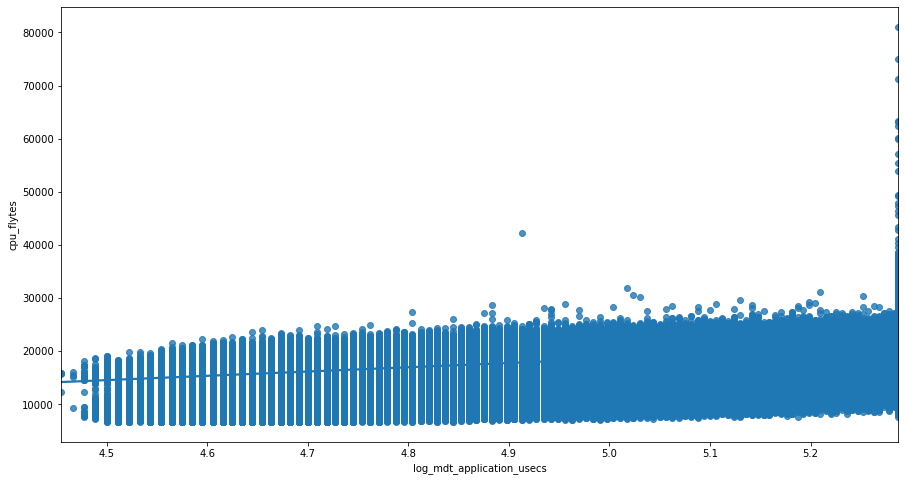

In [44]:
plt.figure(figsize=(15,8))
sns.regplot(x="log_mdt_application_usecs",y="cpu_flytes",data=df)

#### Regression plot of "log_mdt_application_usecs" after taking care of the outliers.

<AxesSubplot:>

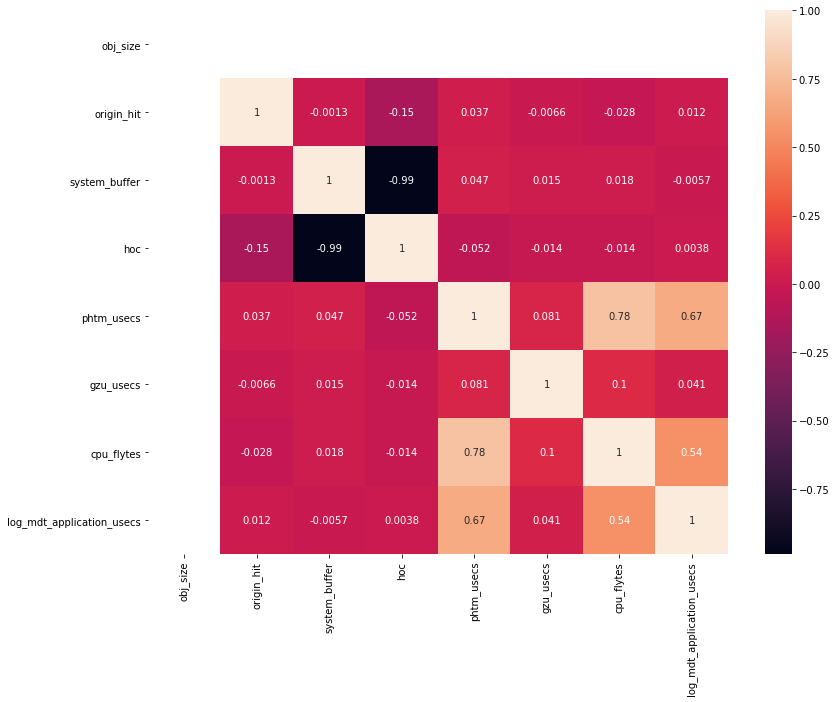

In [349]:
plt.figure(figsize = (13,10))
sns.heatmap(df.corr(),annot=True)

### Clear reduction in the collinearity between "log_mdt_application_usecs" and "phtm_usecs" is seen.
### Combining features as Union: When two variables correlated, they can be combined by a union. I.e. if feature A and B are correlated the new feature would be A ∪ B. Our dataset has discrete values (0 or 1) and continuous values. The former is when Ghost feature is off or on, and the latter is when the feature is dependent on the bytes served.Continuous variables cannot be simply ORed. For that, the mean is taken. Here is the chunk of code.
### Treating highly correlated features "system_buffer" and "hoc".

In [45]:
def _combine(gal_data, columns_to_drop, new_col_name, correlated_col_name, col_type):
    if col_type == "discrete":
        for val in gal_data[correlated_col_name]:
            gal_data[new_col_name] |= gal_data[val] # The columns are ORed
            columns_to_drop.add(val)   
      
    if col_type == "continuous":
        for val in gal_data[correlated_col_name]:
            gal_data[new_col_name] = pd.concat((gal_data[new_col_name], gal_data[val]), axis=1).mean(axis=1) # The mean of the columns is used
            columns_to_drop.add(val)

 

### However here features "hoc" and "system_buffer" are highly correlated with coeff of corr -0.99 and  hence new feature can be a representation of the one.

In [537]:
df["system_buffer+hoc"]=df.system_buffer
df.drop(["hoc"],axis=1,inplace=True)
df.drop(["system_buffer"],axis=1,inplace=True)

<AxesSubplot:>

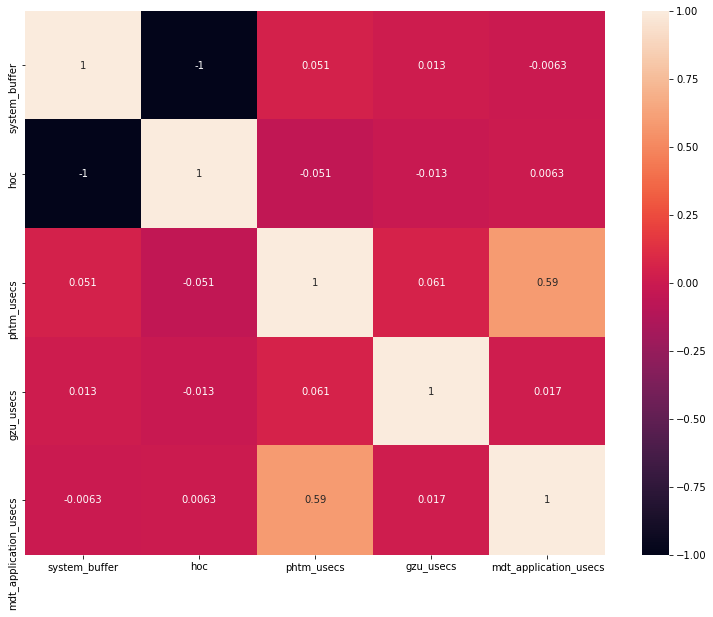

In [745]:
plt.figure(figsize = (13,10))
sns.heatmap(df.drop(["cpu_flytes"],axis=1).corr(),annot=True)

### It can be seen from the above correlation heat map that the all the feature are within the desired range of multi-collinearity and hence we can now proceed with the normalization,  checking for the assumptions and ML model.

## Before going to fit the model we are going to normalize our model for all the continuous variables present in the dataset and make a function to convert back our coefficent obtained from the model for removing the normalization effects for interpretation.
## Plotting the residual plot after fitting the model using ols of statsmodel.api library
## Following assumptions are required to be satisfied which we are going to varify through different methods:
1. Linear Relationship: There must be a linear relationship between the dependent variable and the independent variables.
2. No Multicollinearity: The independent variables are not highly correlated with each other.
3. Normality of Residuals: The residuals are normally distributed.
4. Homoscedasticity: The variance of error terms are similar across the values of the independent variables.


### We are required to drop the "obj_size" feature as it has the same values throughout the dataset and copy out dataset and also store maximum and minimum values so that we can use it for de - normalization of final coefficents for interpretation purposes. 

In [351]:
df_after_feature_engg=df.copy()

In [513]:
# dropping the obj_size feature
df.drop(["obj_size"],axis=1,inplace = True)

/Users/grai/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [539]:
df.head()

,obj_size,origin_hit,phtm_usecs,gzu_usecs,cpu_flytes,mdt_application_usecs,system_buffer+hoc
59216,102400,0,675,105,13883,130,0
74485,102400,0,662,169,13615,161,0
82076,102400,0,678,106,13945,155,0
87682,102400,0,690,141,14191,156,0
91613,102400,0,663,142,13636,113,0


In [540]:
df.drop(["origin_hit","obj_size"],axis=1,inplace=True)

In [541]:
coeff_multiplier={}
for i in df.columns:
    coeff_multiplier[i]=max(df[i])-min(df[i])
print(coeff_multiplier)

{'phtm_usecs': 267, 'gzu_usecs': 91, 'cpu_flytes': 8683, 'mdt_application_usecs': 100, 'system_buffer+hoc': 1}


## Normalizing the features and taking log of response variable "cpu_flytes"

In [542]:
# Defining the normalizing function
def normalize_(arr):
    return (arr-min(arr))/(max(arr)-min(arr))

In [543]:
# Normalizing all the columns except response variable 
for i in df.columns:
    if i!= "cpu_flytes":
        df["norm_"+i]=normalize_(df[i])
df.head()

,phtm_usecs,gzu_usecs,cpu_flytes,mdt_application_usecs,system_buffer+hoc,norm_phtm_usecs,norm_gzu_usecs,norm_mdt_application_usecs,norm_system_buffer+hoc
59216,675,105,13883,130,0,0.865169,0.296703,0.44,0.0
74485,662,169,13615,161,0,0.816479,1.000000,0.75,0.0
82076,678,106,13945,155,0,0.876404,0.307692,0.69,0.0
87682,690,141,14191,156,0,0.921348,0.692308,0.70,0.0
91613,663,142,13636,113,0,0.820225,0.703297,0.27,0.0


/Users/grai/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='cpu_flytes', ylabel='Density'>

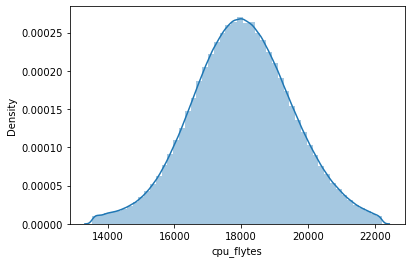

In [544]:
# sm.qqplot(np.log(df.cpu_flytes));
sns.distplot(df.cpu_flytes)

In [545]:
df.head()

,phtm_usecs,gzu_usecs,cpu_flytes,mdt_application_usecs,system_buffer+hoc,norm_phtm_usecs,norm_gzu_usecs,norm_mdt_application_usecs,norm_system_buffer+hoc
59216,675,105,13883,130,0,0.865169,0.296703,0.44,0.0
74485,662,169,13615,161,0,0.816479,1.000000,0.75,0.0
82076,678,106,13945,155,0,0.876404,0.307692,0.69,0.0
87682,690,141,14191,156,0,0.921348,0.692308,0.70,0.0
91613,663,142,13636,113,0,0.820225,0.703297,0.27,0.0


In [566]:
import scipy
df.mdt_application_usecs=(scipy.stats.boxcox(df.mdt_application_usecs, lmbda=None, alpha=None)[0])

/Users/grai/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='norm_mdt_application_usecs', ylabel='Density'>

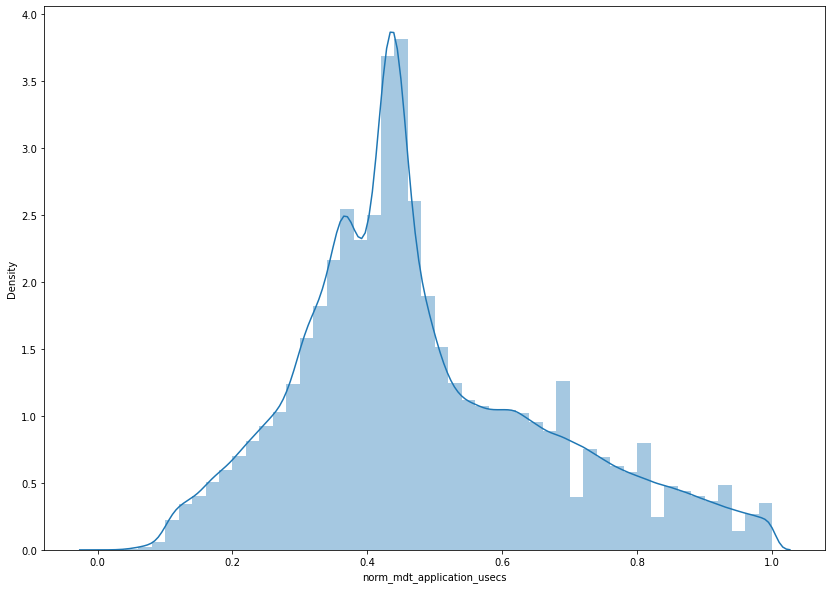

In [549]:
plt.figure(figsize=(14,10))
sns.distplot(df.norm_mdt_application_usecs)

/Users/grai/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='norm_gzu_usecs', ylabel='Density'>

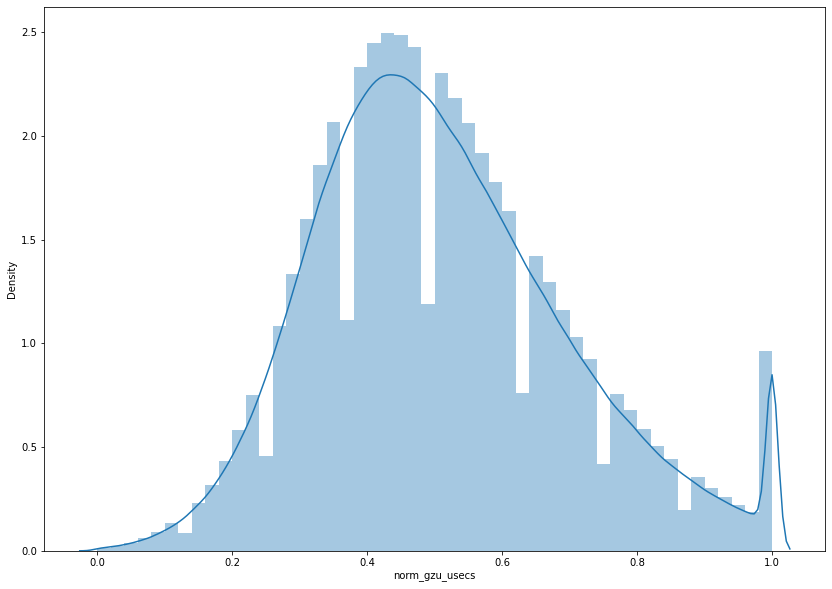

In [496]:
plt.figure(figsize=(14,10))
sns.distplot(df.norm_gzu_usecs)

In [366]:
df.head()

,origin_hit,phtm_usecs,gzu_usecs,cpu_flytes,log_mdt_application_usecs,system_buffer+hoc,norm_origin_hit,norm_phtm_usecs,norm_gzu_usecs,norm_log_mdt_application_usecs,norm_system_buffer+hoc,log_cpu_flytes
4,1,712,120,74933,5.287000,0,1.0,1.0,0.456522,1.000000,0.0,11.224350
5,1,712,84,16646,5.220356,0,1.0,1.0,0.065217,0.919962,0.0,9.719925
7,1,712,103,38605,5.287000,0,1.0,1.0,0.271739,1.000000,0.0,10.561137
8,1,712,94,37106,5.287000,0,1.0,1.0,0.173913,1.000000,0.0,10.521534
9,1,712,122,14033,5.192957,0,1.0,1.0,0.478261,0.887056,0.0,9.549167


/Users/grai/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='log_cpu_flytes', ylabel='Density'>

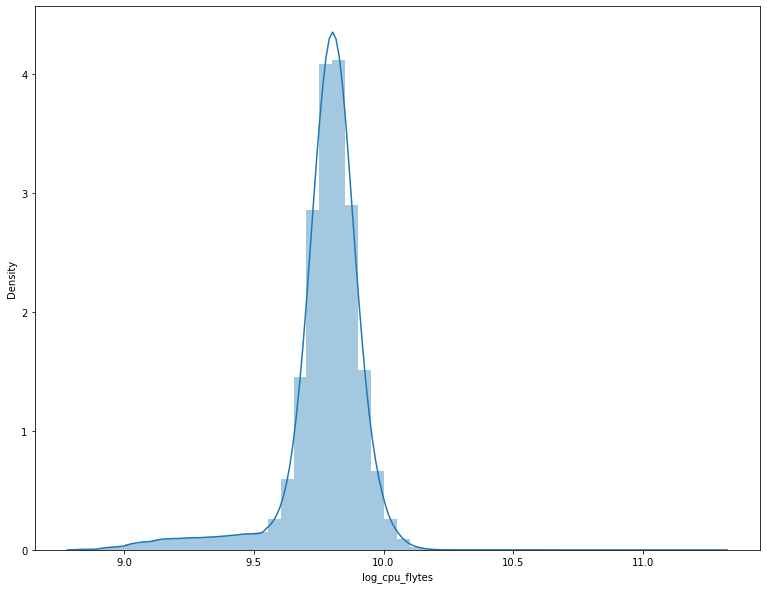

In [305]:
# Visualizing log_cpu_flytes
plt.figure(figsize = (13,10))
sns.distplot(df.log_cpu_flytes)

In [367]:
# dropping the columns not required
df.drop(["origin_hit","cpu_flytes","phtm_usecs","gzu_usecs","mdt_application_usecs","system_buffer+hoc"],axis=1,inplace=True)

In [368]:
df.head()

,norm_origin_hit,norm_phtm_usecs,norm_gzu_usecs,norm_log_mdt_application_usecs,norm_system_buffer+hoc,log_cpu_flytes
4,1.0,1.0,0.456522,1.000000,0.0,11.224350
5,1.0,1.0,0.065217,0.919962,0.0,9.719925
7,1.0,1.0,0.271739,1.000000,0.0,10.561137
8,1.0,1.0,0.173913,1.000000,0.0,10.521534
9,1.0,1.0,0.478261,0.887056,0.0,9.549167


In [369]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [370]:
df.rename(columns={'norm_system_buffer+hoc': 'norm_system_buffer_hoc'},inplace=True) #here parameter columns is a dictionary

In [371]:
df.columns

Index(['norm_origin_hit', 'norm_phtm_usecs', 'norm_gzu_usecs',
       'norm_log_mdt_application_usecs', 'norm_system_buffer_hoc',
       'log_cpu_flytes'],
      dtype='object')

### Ordinary Least Squares

In [373]:
#fit multiple linear regression model
model = ols('log_cpu_flytes ~ norm_origin_hit + norm_phtm_usecs + norm_gzu_usecs + norm_log_mdt_application_usecs + norm_system_buffer_hoc',data = df).fit()

#view model summary

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         log_cpu_flytes   R-squared:                       0.505
Model:                            OLS   Adj. R-squared:                  0.505
Method:                 Least Squares   F-statistic:                 1.004e+06
Date:                Fri, 09 Jul 2021   Prob (F-statistic):               0.00
Time:                        17:05:22   Log-Likelihood:             3.9710e+06
No. Observations:             4913153   AIC:                        -7.942e+06
Df Residuals:                 4913147   BIC:                        -7.942e+06
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

In [459]:
coeff_multiplier

{'origin_hit': 1,
 'phtm_usecs': 268,
 'gzu_usecs': 92,
 'cpu_flytes': 74398,
 'log_mdt_application_usecs': 0.8326527037464926,
 'system_buffer+hoc': 1}

### Denormalization

In [484]:
for i in coeff_multiplier:
    if i=="cpu_flytes":
        continue
    elif i=="system_buffer+hoc":
        print(model.conf_int(alpha=0.05).loc["norm_system_buffer_hoc"]/coeff_multiplier[i])
    else:
        print(model.conf_int(alpha=0.05).loc["norm_"+i]/coeff_multiplier[i])

0   -0.603771
1   -0.590200
Name: norm_origin_hit, dtype: float64
0    0.002086
1    0.002091
Name: norm_phtm_usecs, dtype: float64
0    0.000441
1    0.000452
Name: norm_gzu_usecs, dtype: float64
0    0.020663
1    0.022281
Name: norm_log_mdt_application_usecs, dtype: float64
0   -0.040237
1   -0.038104
Name: norm_system_buffer_hoc, dtype: float64


### Here, -ve coeff. are actually the representation of relationship between the feature and response variable and coeff. values are taken as mod of its value that is magnitude of the values sign is not significant for our purposes of determinig the feature cost and hence the sign is ignored as the negative sign is expected due to its correlation.
### A regression coefficient “with an algebraic sign that is the opposite of that expected” indicates “the presence of serious multicollinearity.”


#### Acceptable values of skewness fall between − 3 and + 3, and kurtosis is appropriate from a range of − 10 to + 10 when utilizing SEM (Brown, 2006). ... Other types of analyses may have lower acceptable skew or kurtosis values so researchers should investigate their planned analysis to determine data screening guidelines.

# Varifying whether the assumptions are satisfied or not using:
## 1. Residual Plots
## 2. QQ plot or NPP for normality check
## 3. Homoskedaticity test and visual analysis through residual plot

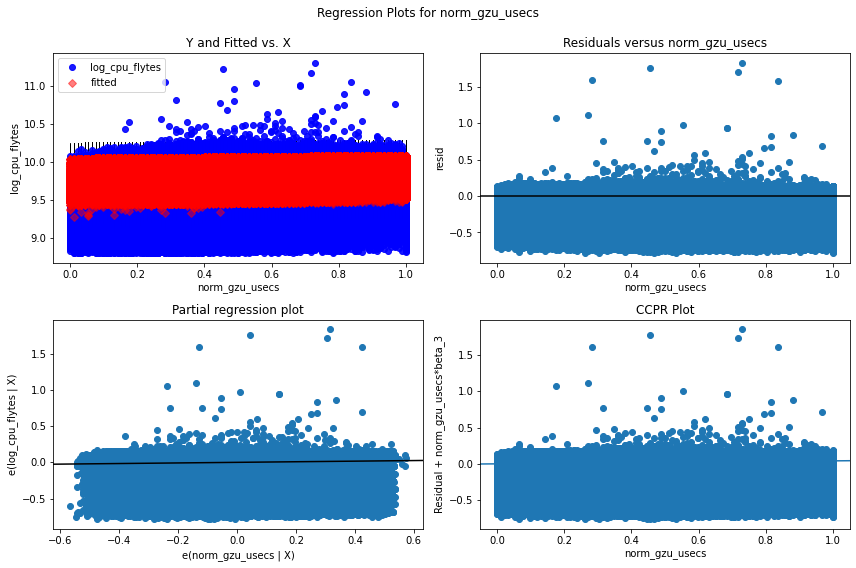

In [90]:
#create residual vs. predictor plot for 'norm_gzu_usecs '
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model, 'norm_gzu_usecs', fig=fig)

### We conclude from the above residual plots that their is no such pattern in the residuals so the condition of linearity is satisfied.
### Also It is observed from the residual plot that the model is homoskedatic as no such deviation in variances of the residual plot is observed.

<AxesSubplot:>

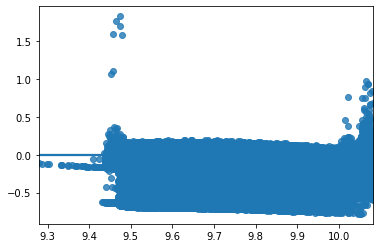

In [94]:
# Checking the condition of normality of the residuals.
sns.regplot(x=model.fittedvalues,y=model.resid)

/Users/grai/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

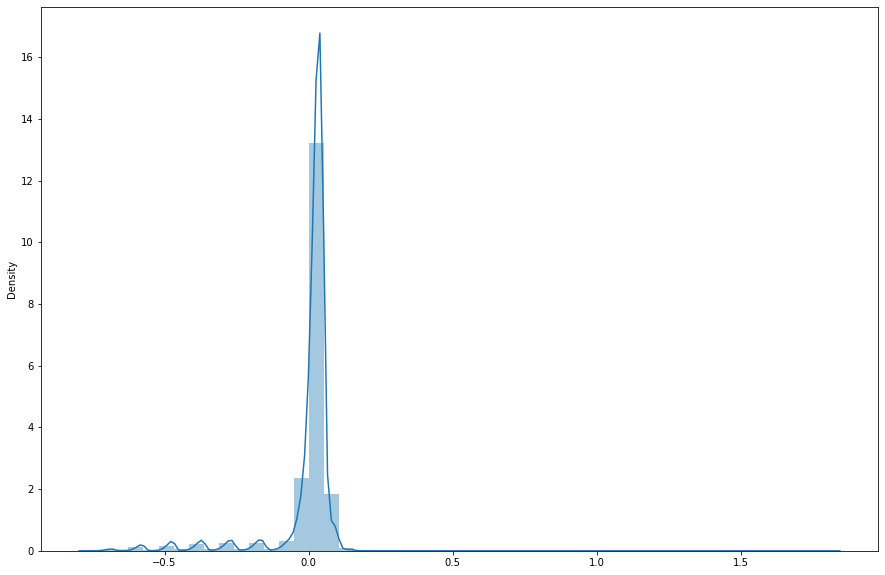

In [375]:
plt.figure(figsize=(15,10))
sns.distplot(model.resid)

<Figure size 1080x1080 with 0 Axes>

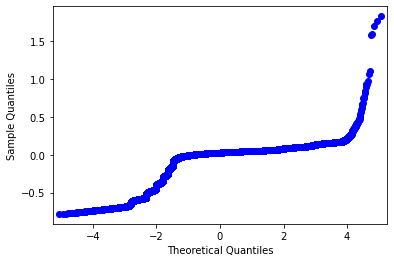

In [374]:
plt.figure(figsize=(15,15))
sm.qqplot(model.resid);

In [376]:
# D'Agostino and Pearson's Test
from scipy.stats import normaltest
# normality test
stat, p = normaltest(model.resid)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=3808694.217, p=0.000
Sample does not look Gaussian (reject H0)


In [377]:
# Shapiro-Wilk Test
from scipy.stats import shapiro
stat, p = shapiro(model.resid)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.527, p=0.000
Sample does not look Gaussian (reject H0)


/Users/grai/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


## We can see from the above NPP plot or QQ plot and D'Agostino and Pearson's Test and Shapiro-Wilk Test that the normality assumption is violated.

# The normality test fails as the data is highly leptokurtic and not iid sample and hence high kurtosis causing this issue.

# Try removing all outliers in the response variable

In [404]:
df.head()

,norm_origin_hit,norm_phtm_usecs,norm_gzu_usecs,norm_log_mdt_application_usecs,norm_system_buffer_hoc,log_cpu_flytes
4,1.0,1.0,0.456522,1.000000,0.0,11.224350
5,1.0,1.0,0.065217,0.919962,0.0,9.719925
7,1.0,1.0,0.271739,1.000000,0.0,10.561137
8,1.0,1.0,0.173913,1.000000,0.0,10.521534
9,1.0,1.0,0.478261,0.887056,0.0,9.549167


/Users/grai/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


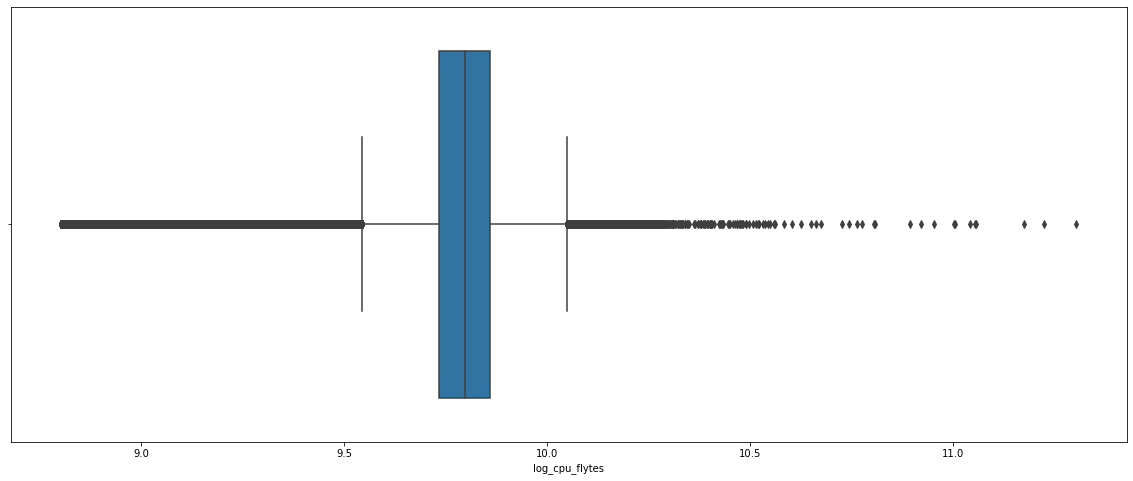

In [405]:
# handling outliers in "log_cpu_flytes"
plt.figure(figsize = (20,8))
sns.boxplot(df.log_cpu_flytes);

In [406]:
outlier_limits(df.log_cpu_flytes)

(9.542609809413964, 10.049356765152194)

In [407]:
df[(df.log_cpu_flytes<9.542609809413964)|(df.log_cpu_flytes>10.049356765152194)]

,norm_origin_hit,norm_phtm_usecs,norm_gzu_usecs,norm_log_mdt_application_usecs,norm_system_buffer_hoc,log_cpu_flytes
4,1.0,1.000000,0.456522,1.000000,0.0,11.224350
7,1.0,1.000000,0.271739,1.000000,0.0,10.561137
8,1.0,1.000000,0.173913,1.000000,0.0,10.521534
11,1.0,1.000000,0.315217,1.000000,0.0,9.463353
12,1.0,1.000000,0.728261,1.000000,0.0,11.302846
...,...,...,...,...,...,...
4926230,0.0,1.000000,0.619565,1.000000,0.0,10.072977
4926902,0.0,1.000000,0.554348,1.000000,0.0,10.108182
4926958,0.0,0.966418,0.369565,0.893710,0.0,10.053759
4927034,0.0,1.000000,0.293478,0.619065,0.0,10.079414


In [408]:
# Removing these values
df=df[(df.log_cpu_flytes>=9.54)&(df.log_cpu_flytes<=10.049356765152194)]

In [409]:
df.head()

,norm_origin_hit,norm_phtm_usecs,norm_gzu_usecs,norm_log_mdt_application_usecs,norm_system_buffer_hoc,log_cpu_flytes
5,1.0,1.0,0.065217,0.919962,0.0,9.719925
9,1.0,1.0,0.478261,0.887056,0.0,9.549167
15,1.0,1.0,0.347826,0.738071,0.0,9.589119
16,1.0,1.0,0.206522,0.860067,0.0,9.718964
18,1.0,1.0,0.608696,0.964566,0.0,9.632269


In [410]:
# Fitting the model again
#fit multiple linear regression model
model1 = ols('log_cpu_flytes ~ norm_origin_hit + norm_phtm_usecs + norm_gzu_usecs + norm_log_mdt_application_usecs + norm_system_buffer_hoc',data = df).fit()

#view model summary
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:         log_cpu_flytes   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                 5.888e+06
Date:                Fri, 09 Jul 2021   Prob (F-statistic):               0.00
Time:                        18:40:33   Log-Likelihood:             9.2158e+06
No. Observations:             4600731   AIC:                        -1.843e+07
Df Residuals:                 4600725   BIC:                        -1.843e+07
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

### Interpretation by De-normalizing:

In [ ]:
model1.predict

/Users/grai/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

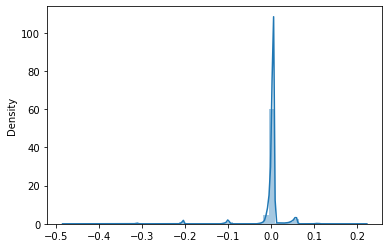

In [411]:
sns.distplot(model1.resid)

<Figure size 360x360 with 0 Axes>

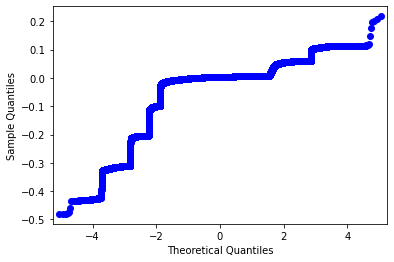

In [412]:
plt.figure(figsize=(5,5))
sm.qqplot(model1.resid);

In [413]:
# D'Agostino and Pearson's Test
from scipy.stats import normaltest
# normality test
stat, p = normaltest(model1.resid)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=4762817.613, p=0.000
Sample does not look Gaussian (reject H0)


#### Only some improvements are seen.

# Null Hypothesis H0: The coefficient is not significant.
# Alternate hypothesis Ha: The coefficient is significant and can be considered for the required purposes.
## P - value : Partial F Test 
## A partial F-test calculates the following F test-statistic:
### F = ((RSSreduced – RSSfull)/p)  /  (RSSfull/n-k)
#### where:
RSSreduced: The residual sum of squares of the reduced (i.e. “nested”) model.
RSSfull: The residual sum of squares of the full model.
p: The number of predictors removed from the full model.
n: The total observations in the dataset.
k: The number of coefficients (including the intercept) in the full model.
### If the p-value corresponding to the F test-statistic is below a certain significance level (e.g. 0.05), then we can reject the null hypothesis and conclude that at least one of the coefficients removed from the full model is significant.


# Performing Hypothesis test on all the coefficients

In [378]:
df.columns

Index(['norm_origin_hit', 'norm_phtm_usecs', 'norm_gzu_usecs',
       'norm_log_mdt_application_usecs', 'norm_system_buffer_hoc',
       'log_cpu_flytes'],
      dtype='object')

In [379]:
for i in df.columns[:-1]:
    hypotheses = '('+i+' = 0)'
    f_test = model.f_test(hypotheses)
    print(f_test)

<F test: F=array([[29733.53635861]]), p=0.0, df_denom=4.91e+06, df_num=1>
<F test: F=array([[2561331.29886604]]), p=0.0, df_denom=4.91e+06, df_num=1>
<F test: F=array([[24898.05446604]]), p=0.0, df_denom=4.91e+06, df_num=1>
<F test: F=array([[2704.1997611]]), p=0.0, df_denom=4.91e+06, df_num=1>
<F test: F=array([[5183.93313618]]), p=0.0, df_denom=4.91e+06, df_num=1>


### Since, All the P-values are less then 0.05 ,so on 5 % significance level we can reject the null Hypothesis and all the model coefficeients are significant. 

## Making a model without normalization

In [381]:
df_after_feature_engg.head()

,obj_size,origin_hit,phtm_usecs,gzu_usecs,cpu_flytes,log_mdt_application_usecs,system_buffer+hoc
4,102400,1,712,120,74933,5.287000,0
5,102400,1,712,84,16646,5.220356,0
7,102400,1,712,103,38605,5.287000,0
8,102400,1,712,94,37106,5.287000,0
9,102400,1,712,122,14033,5.192957,0


In [382]:
# dropping the obj_size feature
df_after_feature_engg.drop(["obj_size"],axis=1,inplace = True)

In [383]:
df_after_feature_engg.rename(columns={'system_buffer+hoc': 'system_buffer_hoc'},inplace=True) #here parameter columns is a dictionary

In [384]:
df_after_feature_engg.columns

Index(['origin_hit', 'phtm_usecs', 'gzu_usecs', 'cpu_flytes',
       'log_mdt_application_usecs', 'system_buffer_hoc'],
      dtype='object')

In [386]:
#Taking log of cpu_flytes
df_after_feature_engg["log_cpu_flytes"]=np.log(df_after_feature_engg.cpu_flytes)
df_after_feature_engg.drop(["cpu_flytes"],axis=1,inplace=True)
df_after_feature_engg.head()

,origin_hit,phtm_usecs,gzu_usecs,log_mdt_application_usecs,system_buffer_hoc,log_cpu_flytes
4,1,712,120,5.287000,0,11.224350
5,1,712,84,5.220356,0,9.719925
7,1,712,103,5.287000,0,10.561137
8,1,712,94,5.287000,0,10.521534
9,1,712,122,5.192957,0,9.549167


In [387]:
#fit multiple linear regression model
model2 = ols('log_cpu_flytes ~ origin_hit + phtm_usecs + gzu_usecs + log_mdt_application_usecs + system_buffer_hoc',data = df_after_feature_engg).fit()

#view model summary
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:         log_cpu_flytes   R-squared:                       0.505
Model:                            OLS   Adj. R-squared:                  0.505
Method:                 Least Squares   F-statistic:                 1.004e+06
Date:                Fri, 09 Jul 2021   Prob (F-statistic):               0.00
Time:                        17:24:58   Log-Likelihood:             3.9710e+06
No. Observations:             4913153   AIC:                        -7.942e+06
Df Residuals:                 4913147   BIC:                        -7.942e+06
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

<AxesSubplot:>

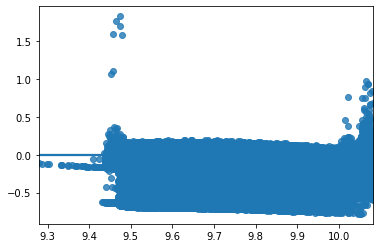

In [393]:
# Checking the condition of normality of the residuals.
sns.regplot(x=model2.fittedvalues,y=model.resid)

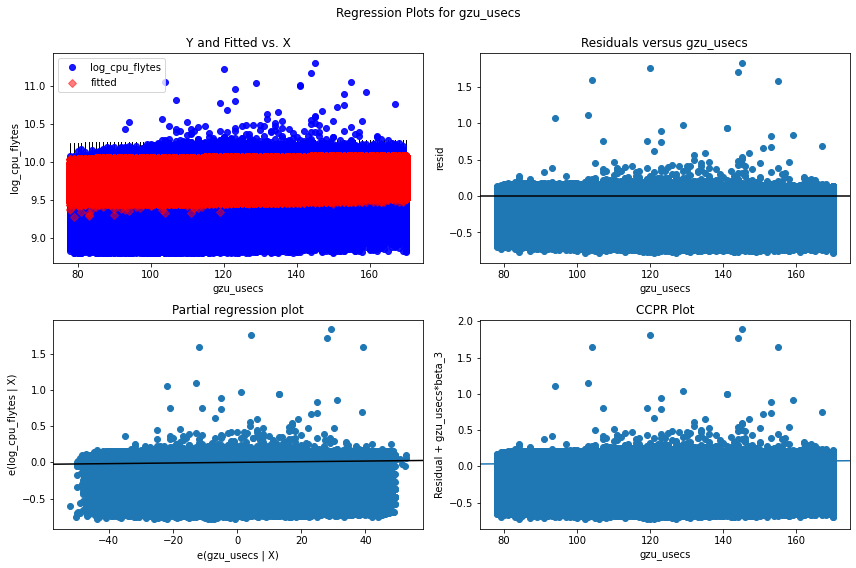

In [394]:
#create residual vs. predictor plot for 'norm_gzu_usecs '
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model2, 'gzu_usecs', fig=fig)

### We conclude from the above residual plots that their is no such pattern in the residuals so the condition of linearity is satisfied.
### Also It is observed from the residual plot that the model is homoskedatic as no such deviation in variances of the residual plot is observed.

<Figure size 360x360 with 0 Axes>

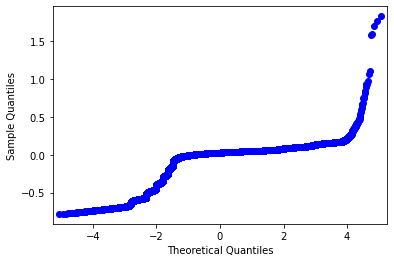

In [388]:
plt.figure(figsize=(5,5))
sm.qqplot(model2.resid);

In [389]:
# D'Agostino and Pearson's Test
from scipy.stats import normaltest
# normality test
stat, p = normaltest(model2.resid)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=3808694.217, p=0.000
Sample does not look Gaussian (reject H0)


# Normality assumption is not satisfied 

# Performing Partial F Test on coefficients obtained
## Null Hypothesis H0: The coefficient is not significant.
## Alternate hypothesis Ha: The coefficient is significant and can be considered for the required purposes.
## P - value : Partial F Test
## A partial F-test calculates the following F test-statistic:
### F = ((RSSreduced – RSSfull)/p) / (RSSfull/n-k)
where:
RSSreduced: The residual sum of squares of the reduced (i.e. “nested”) model. RSSfull: The residual sum of squares of the full model. p: The number of predictors removed from the full model. n: The total observations in the dataset. k: The number of coefficients (including the intercept) in the full model.
If the p-value corresponding to the F test-statistic is below a certain significance level (e.g. 0.05), then we can reject the null hypothesis and conclude that at least one of the coefficients removed from the full model is significant.


# Performing Hypothesis test on all the coefficients

In [391]:
df_after_feature_engg.columns

Index(['origin_hit', 'phtm_usecs', 'gzu_usecs', 'log_mdt_application_usecs',
       'system_buffer_hoc', 'log_cpu_flytes'],
      dtype='object')

In [392]:
for i in df_after_feature_engg.columns[:-1]:
    hypotheses = '('+i+' = 0)'
    f_test = model2.f_test(hypotheses)
    print(f_test)

<F test: F=array([[29733.5363586]]), p=0.0, df_denom=4.91e+06, df_num=1>
<F test: F=array([[2561331.29886611]]), p=0.0, df_denom=4.91e+06, df_num=1>
<F test: F=array([[24898.054466]]), p=0.0, df_denom=4.91e+06, df_num=1>
<F test: F=array([[2704.1997611]]), p=0.0, df_denom=4.91e+06, df_num=1>
<F test: F=array([[5183.93313618]]), p=0.0, df_denom=4.91e+06, df_num=1>


### Since, All the P-values are less then 0.05 ,so on 5 % significance level we say we have enough evidence to reject the null Hypothesis and all the model coefficeients are significant.

In [416]:
outlier_limits(df_after_feature_engg.log_cpu_flytes)

(9.542609809413964, 10.049356765152194)

In [418]:
df_after_feature_engg[(df_after_feature_engg.log_cpu_flytes<9.542609809413964)|(df_after_feature_engg.log_cpu_flytes>10.049356765152194)]

,origin_hit,phtm_usecs,gzu_usecs,log_mdt_application_usecs,system_buffer_hoc,log_cpu_flytes
4,1,712,120,5.287000,0,11.224350
7,1,712,103,5.287000,0,10.561137
8,1,712,94,5.287000,0,10.521534
11,1,712,107,5.287000,0,9.463353
12,1,712,145,5.287000,0,11.302846
...,...,...,...,...,...,...
4926230,0,712,135,5.287000,0,10.072977
4926902,0,712,129,5.287000,0,10.108182
4926958,0,703,112,5.198497,0,10.053759
4927034,0,712,105,4.969813,0,10.079414


In [419]:
df_after_feature_engg=df_after_feature_engg[(df_after_feature_engg.log_cpu_flytes>=9.54)&(df_after_feature_engg.log_cpu_flytes<=10.049356765152194)]

In [334]:
# D'Agostino and Pearson's Test
from scipy.stats import normaltest
# normality test
stat, p = normaltest(model3.resid)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=4160615.984, p=0.000
Sample does not look Gaussian (reject H0)


# If Choosing model2 as the suitable model for coeff. however R2 value is lower compared to normalized model

In [396]:
model2.params

Intercept                    8.406699
origin_hit                  -0.596985
phtm_usecs                   0.002088
gzu_usecs                    0.000446
log_mdt_application_usecs    0.021472
system_buffer_hoc           -0.039171
dtype: float64

## Here, -ve coeff. are actually the representation of relationship between the feature and response variable and coeff. values are taken as mod of its value that is magnitude of the values sign is not significant for our purposes of determinig the feature cost and hence the sign is ignored as it is incorporated in the coeff. due to its feature and not intrinsic to it.

# The value of coefficients with 95% confidence Interval are as follows:
## Features              Lower limit     Upper Limit  
### origin_hit                    [ 0.604    ,   0.590 ]
### phtm_usecs                   [ 0.0021  ,    0.0021 ]
### gzu_usecs                     [ 0.0004   ,   0.0004 ]
### log_mdt_application_usecs     [ 0.021    ,   0.022 ]
### system_buffer_hoc            [ 0.040  ,     0.038 ]